# Animacija u IPython notebooku
Napravit ćemo animaciju koristeći biblioteku [JSAnimation](https://github.com/jakevdp/JSAnimation).

__Upute__:
Na meniju kliknite na New, iskopirajte sljedeći link https://github.com/jakevdp/JSAnimation i pritsnite enter.

Ili, alternativno, samo iskopirajte projekt za ova predavanja.

In [3]:
from pylab import *
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [5]:
from scipy.integrate import odeint

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [pi/2, pi/2, 0, 0]  # početno stanje
t = linspace(0, 10, 250) # vremena
x = odeint(dx, x0, t)    # rješenje ODJ


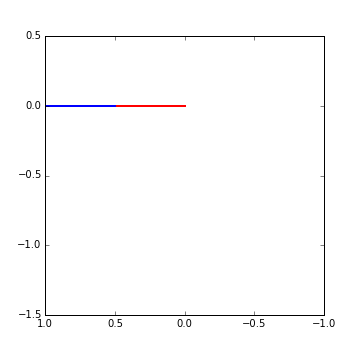
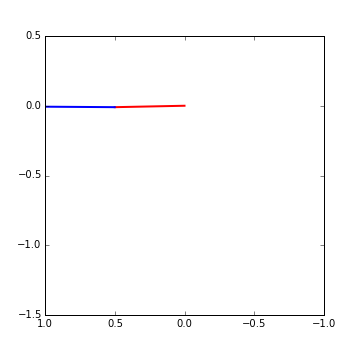
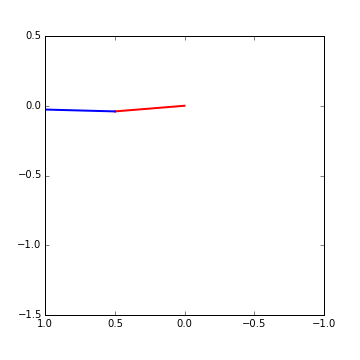
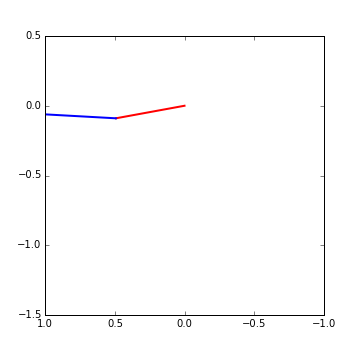
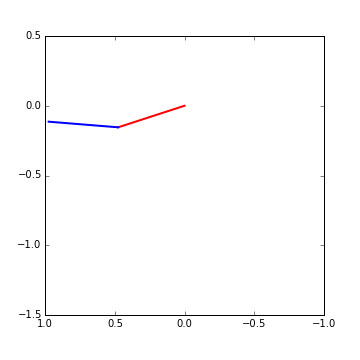
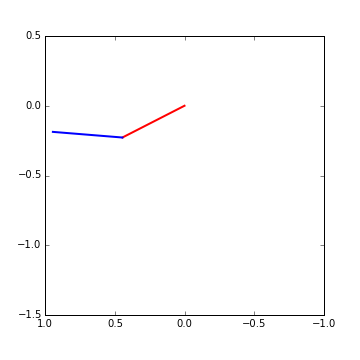
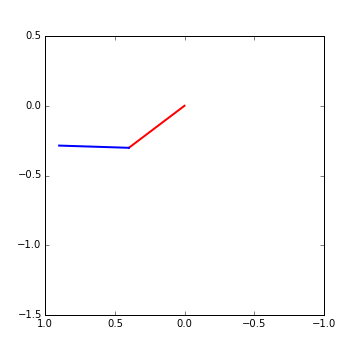
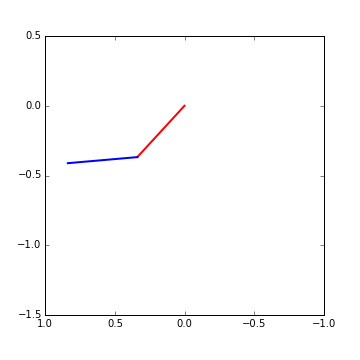
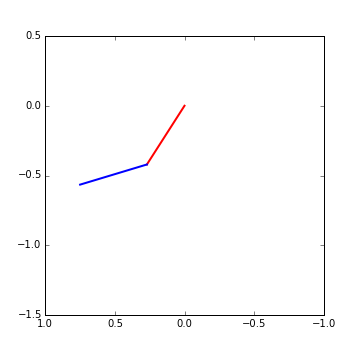
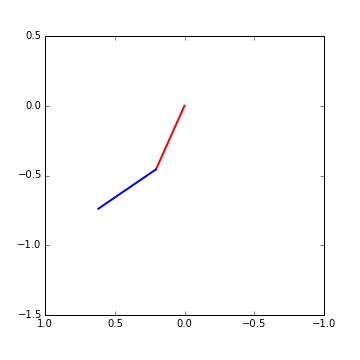
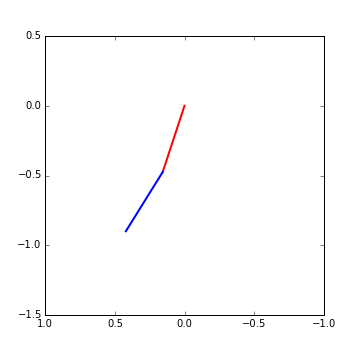
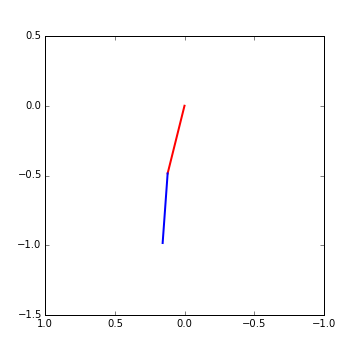
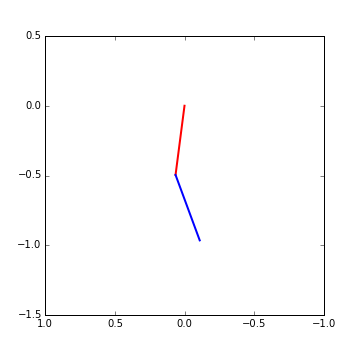
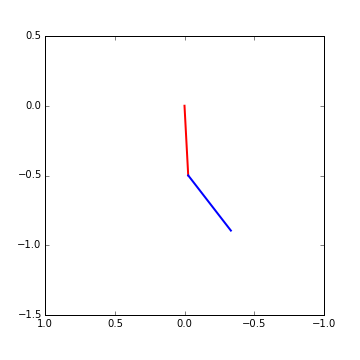
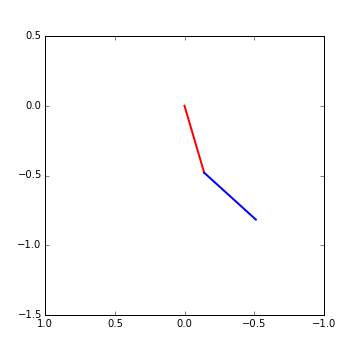
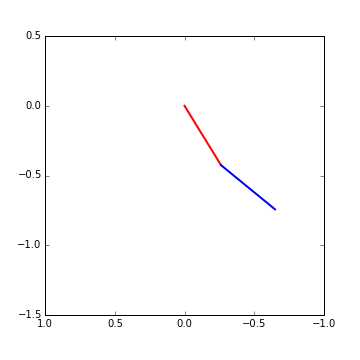
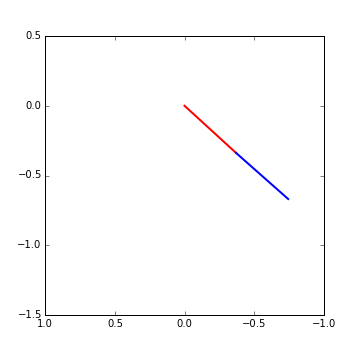
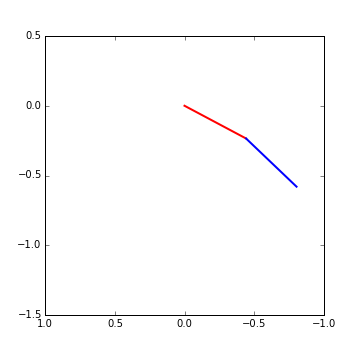
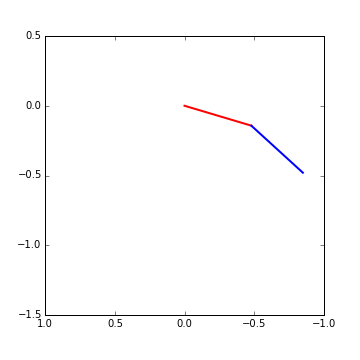
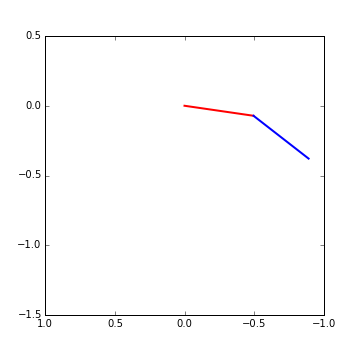
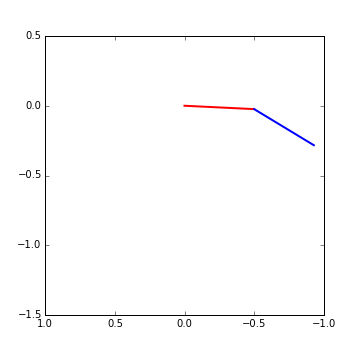
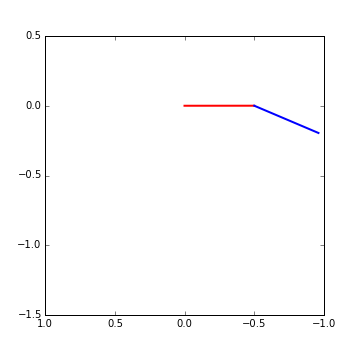
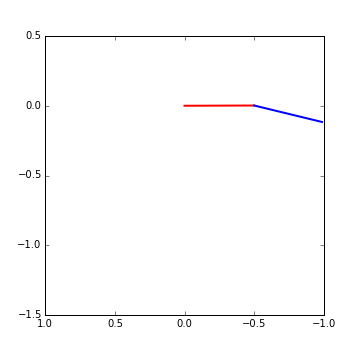
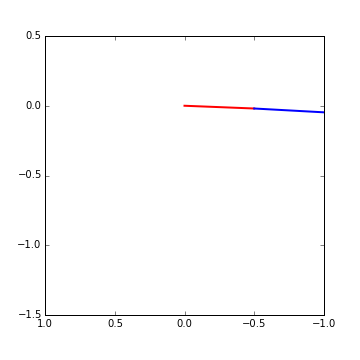
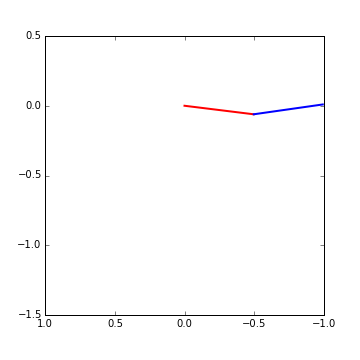
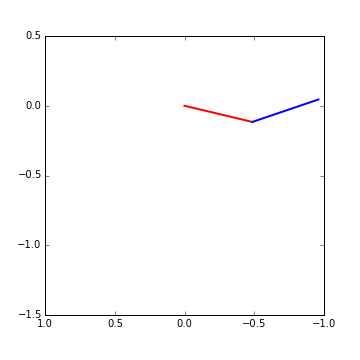
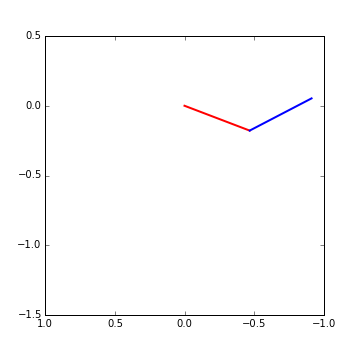
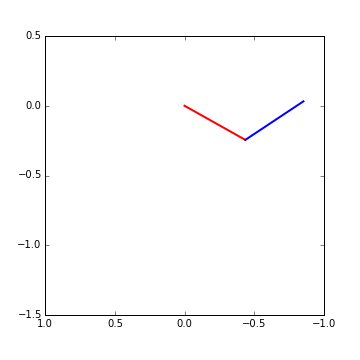
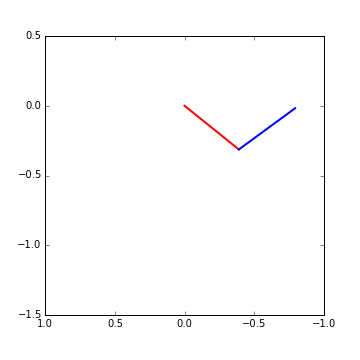
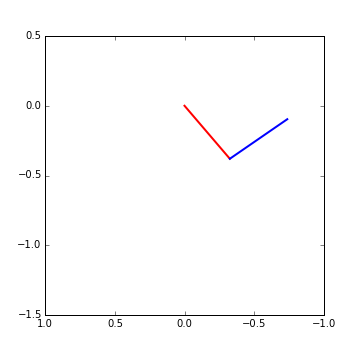
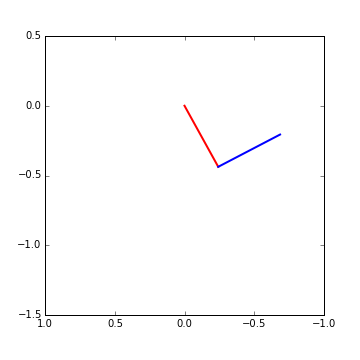
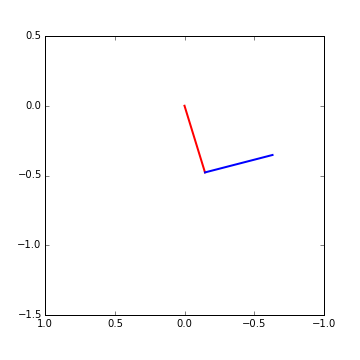
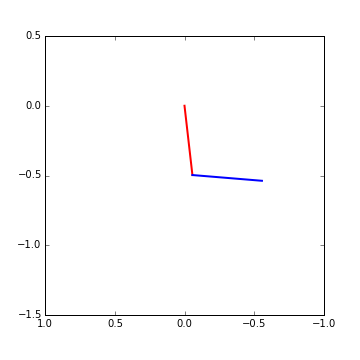
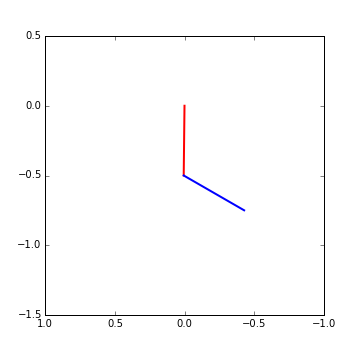
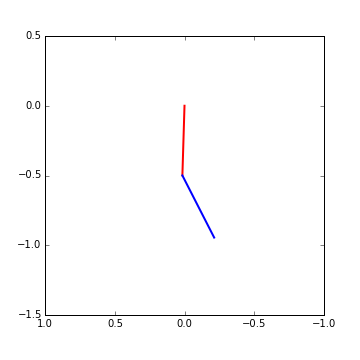
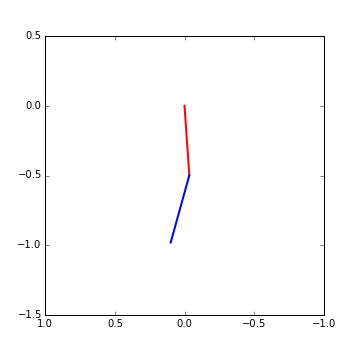
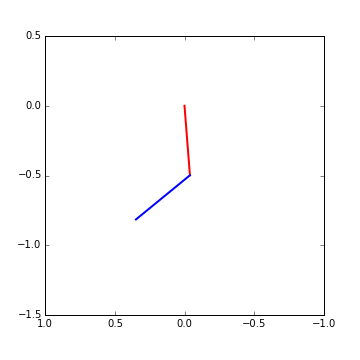
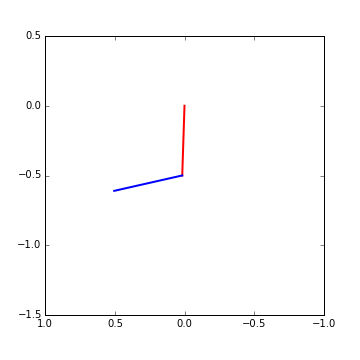
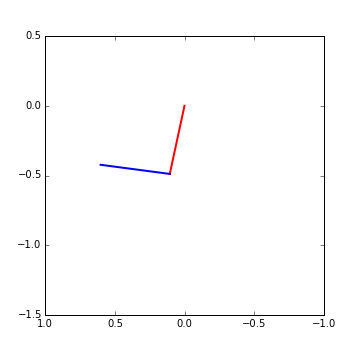
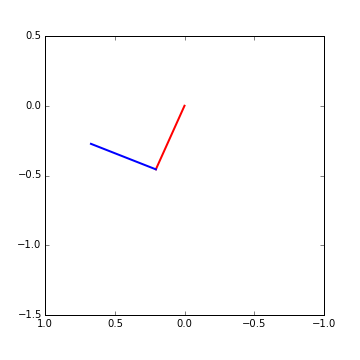
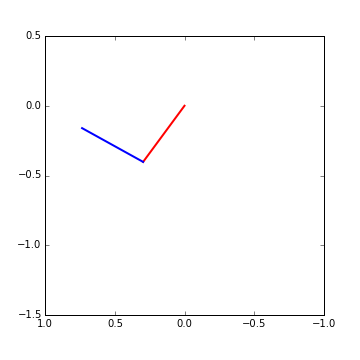
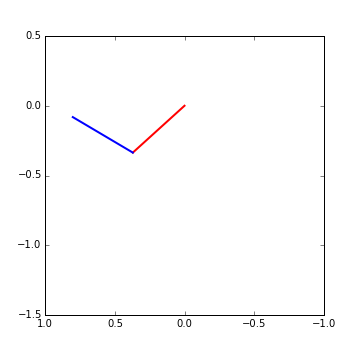
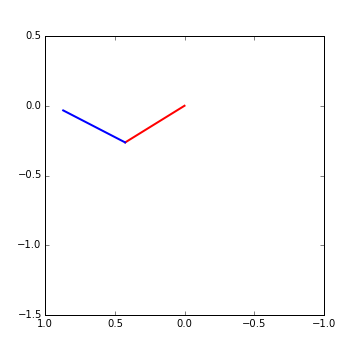
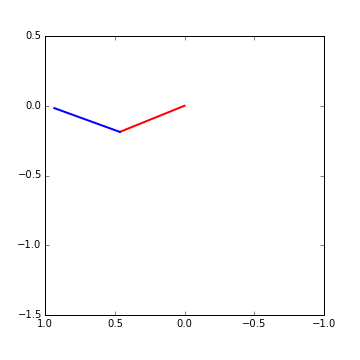
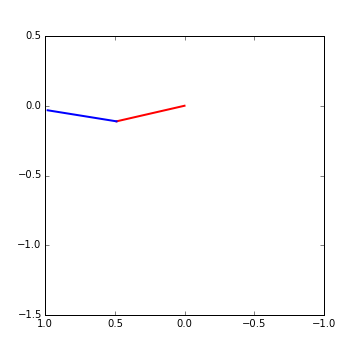
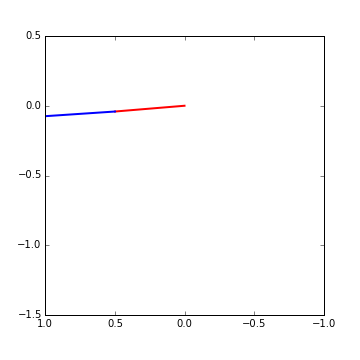
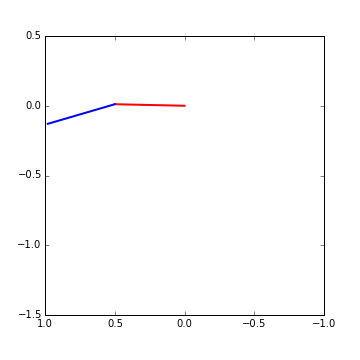
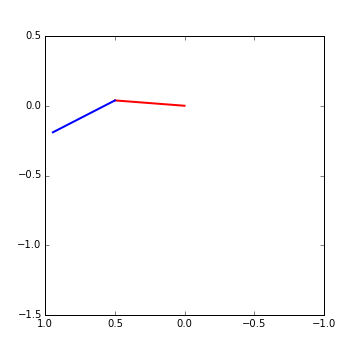
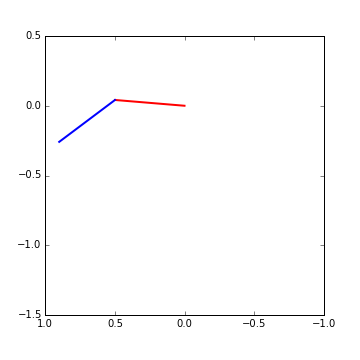
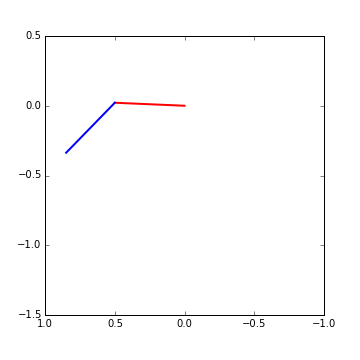
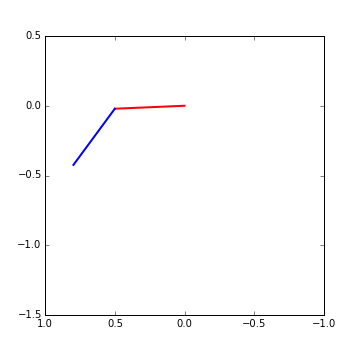
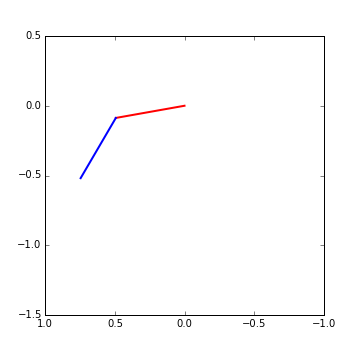
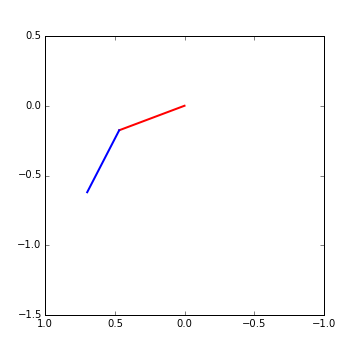
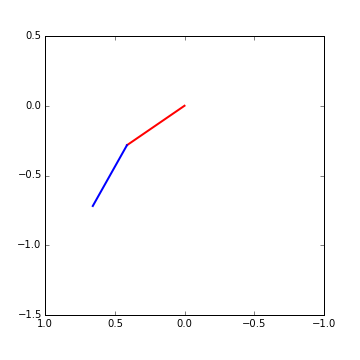
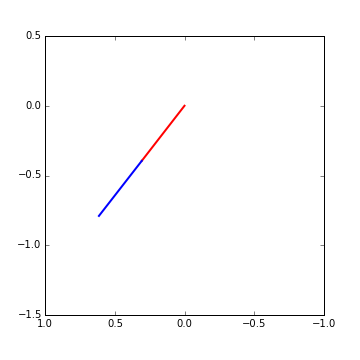
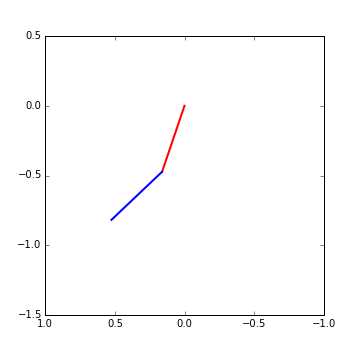
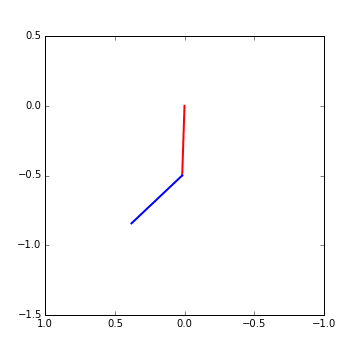
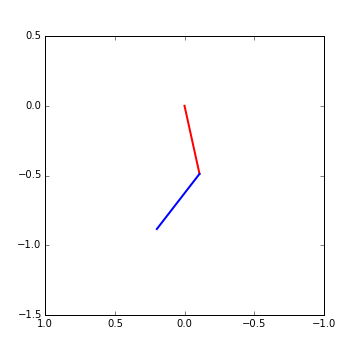
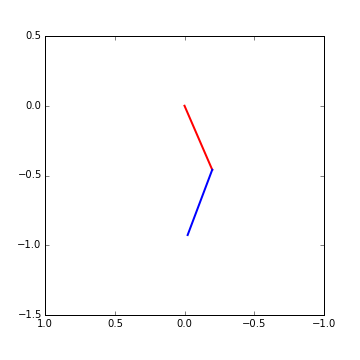
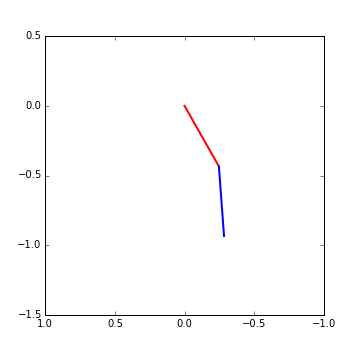
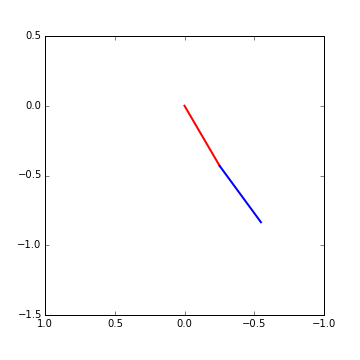
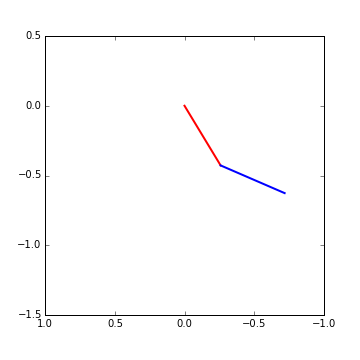
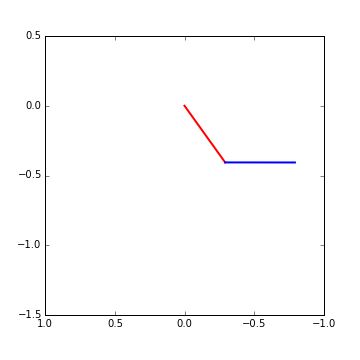
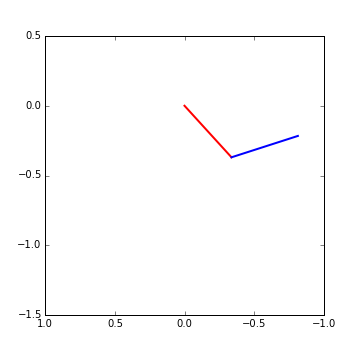
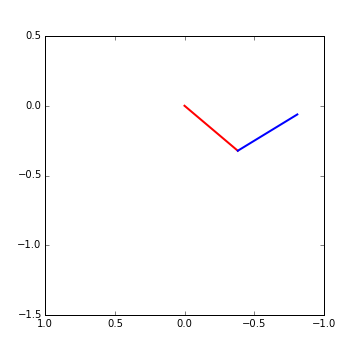
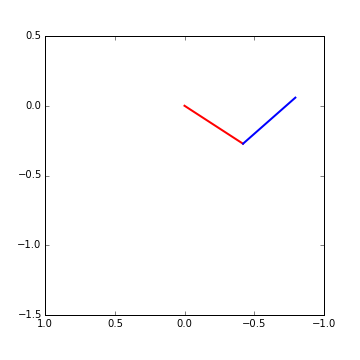
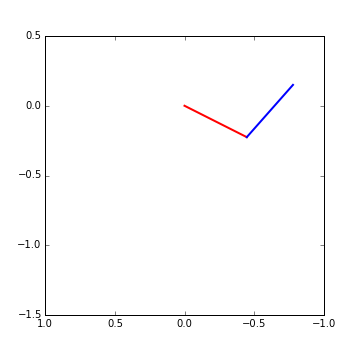
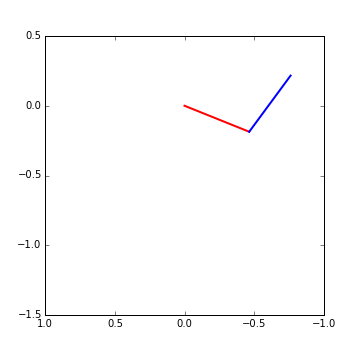
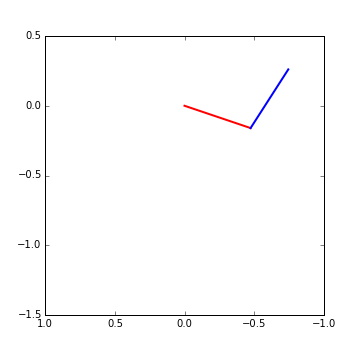
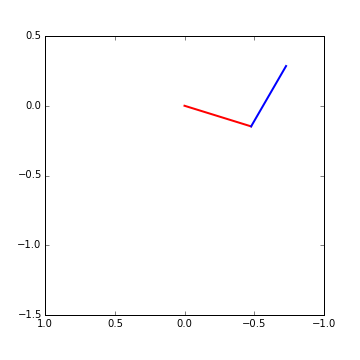
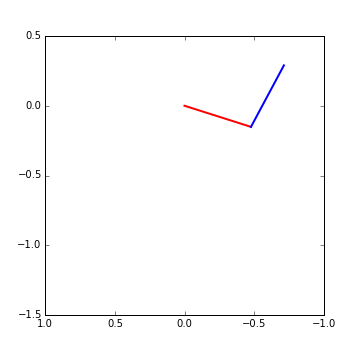
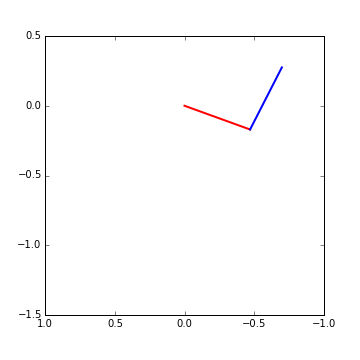
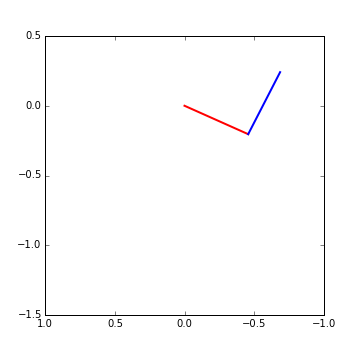
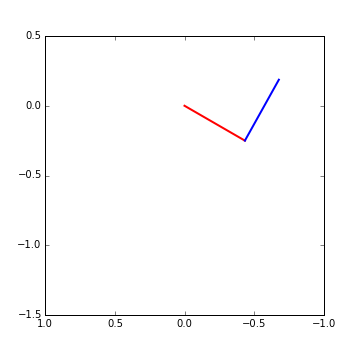
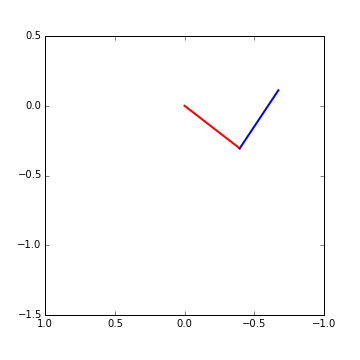
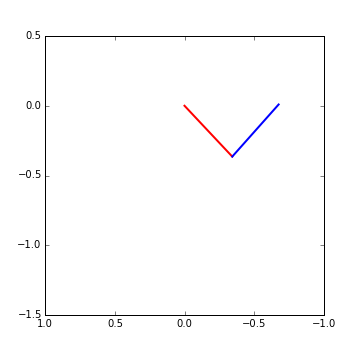
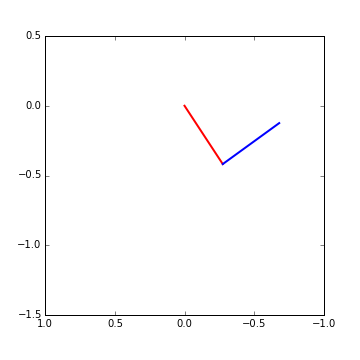
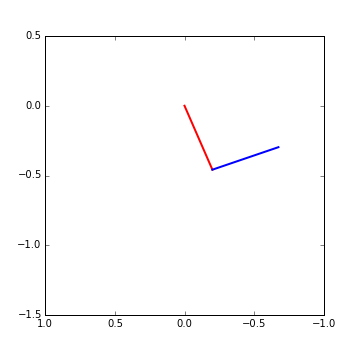
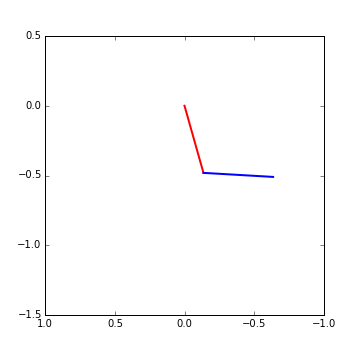
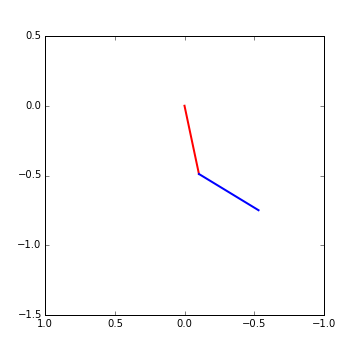
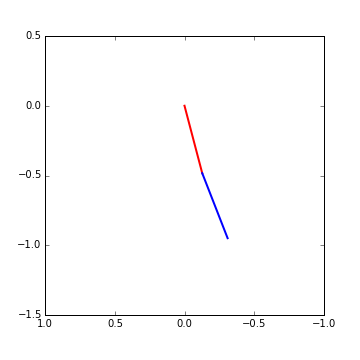
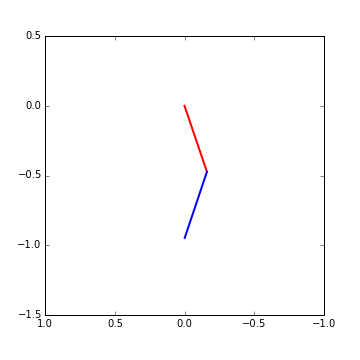
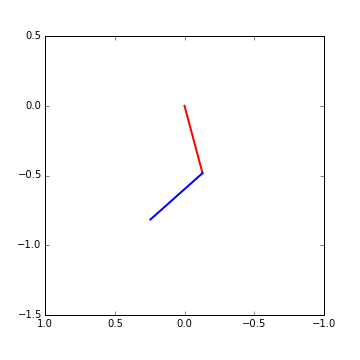
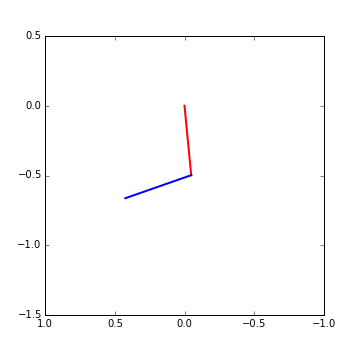
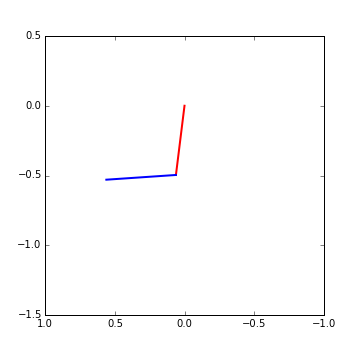
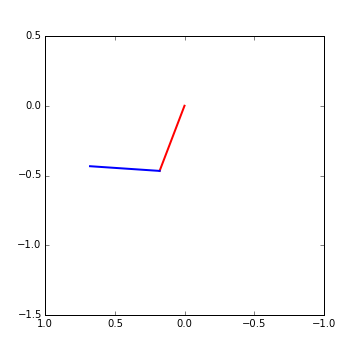
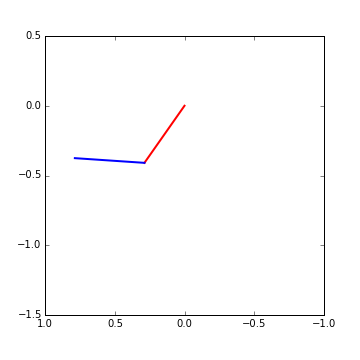
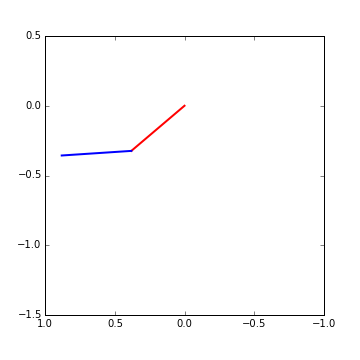
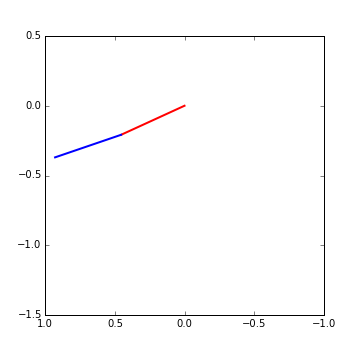
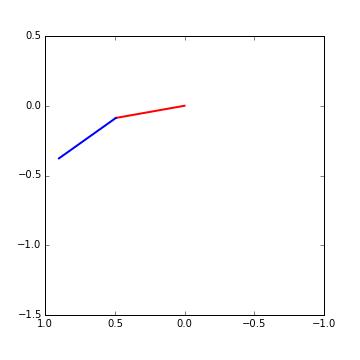
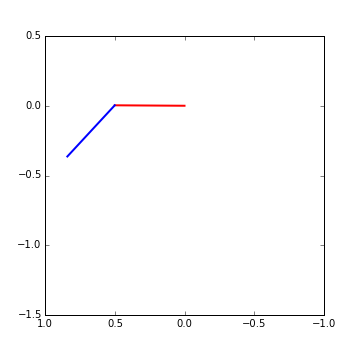
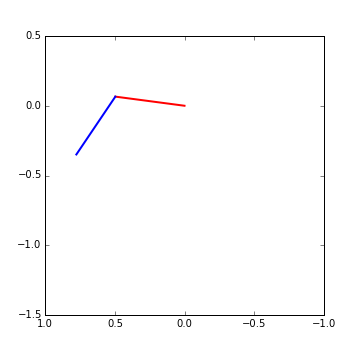
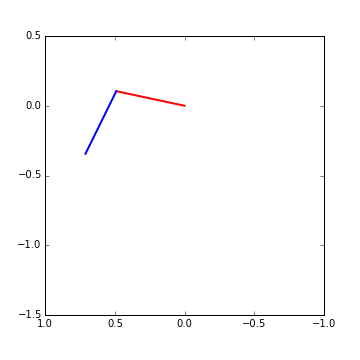
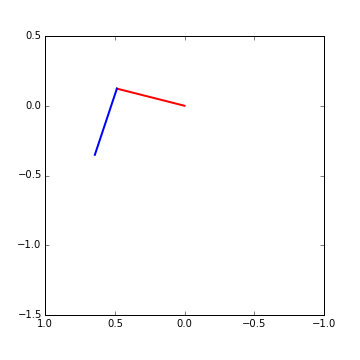
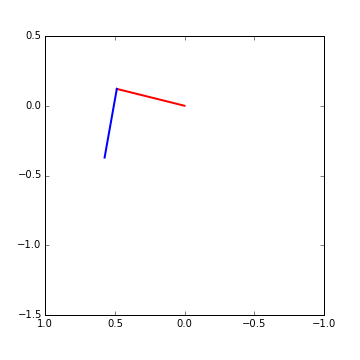
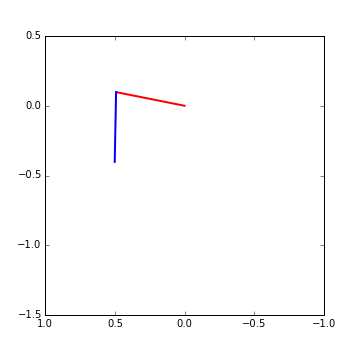
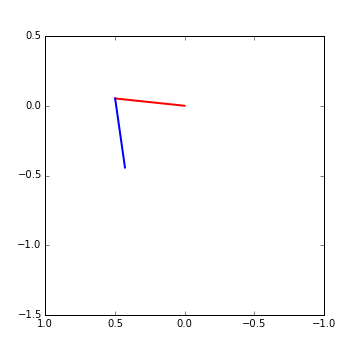
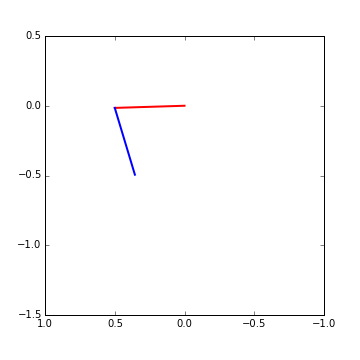
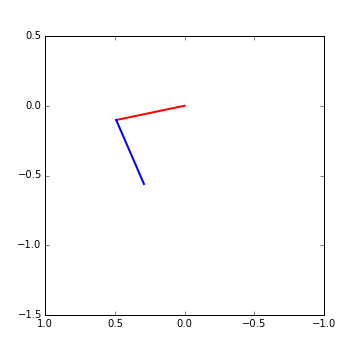
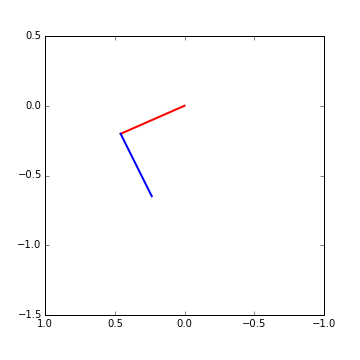
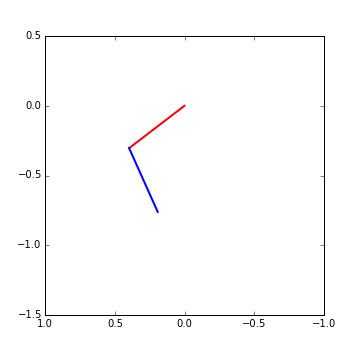
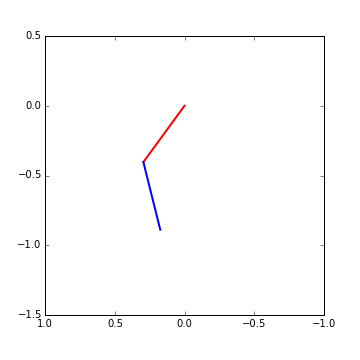
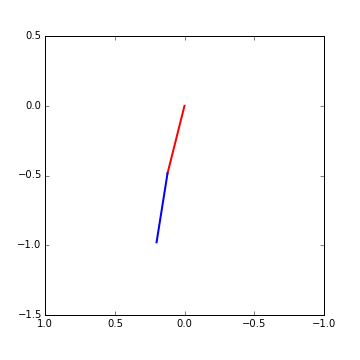
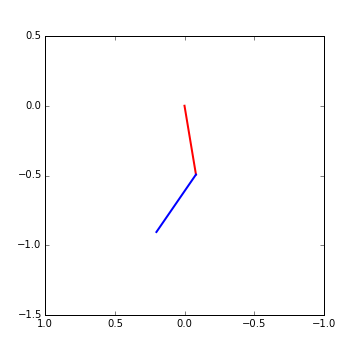
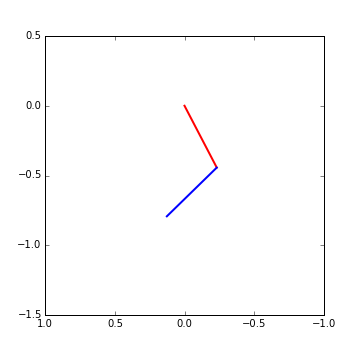
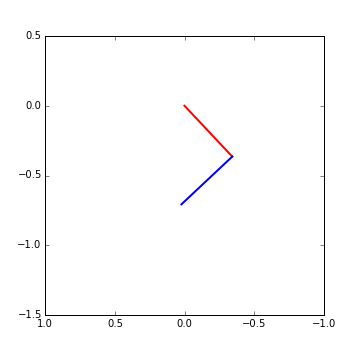
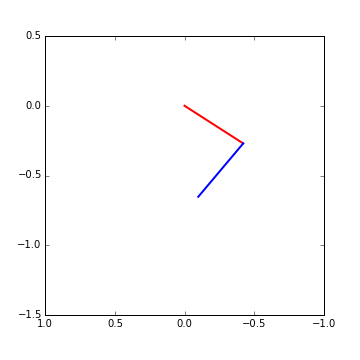
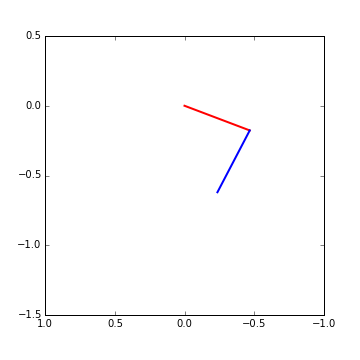
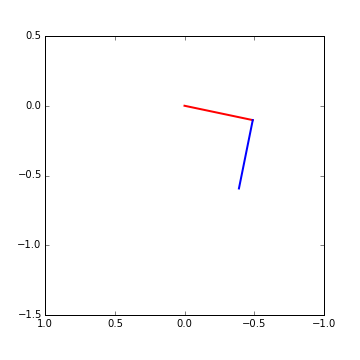
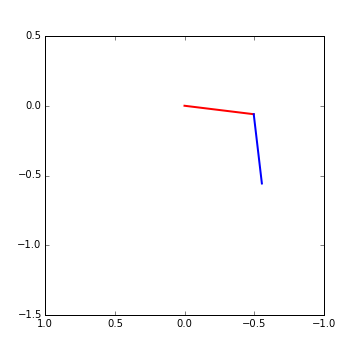
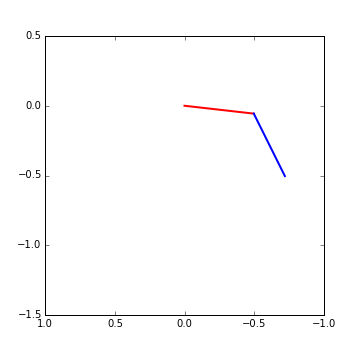
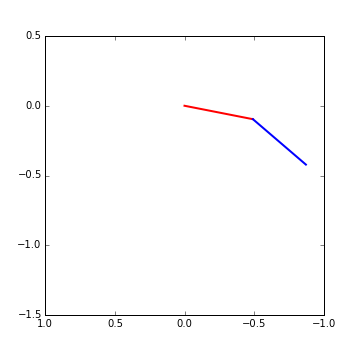
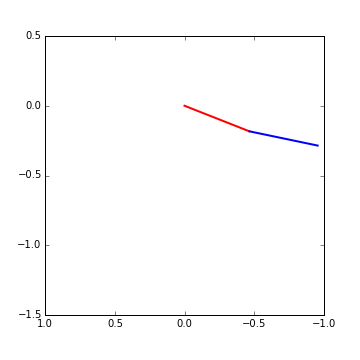
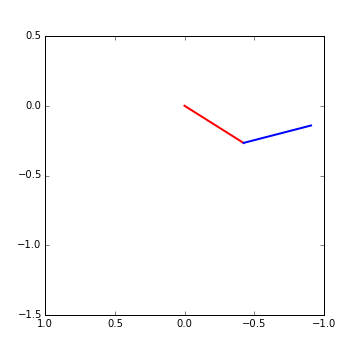
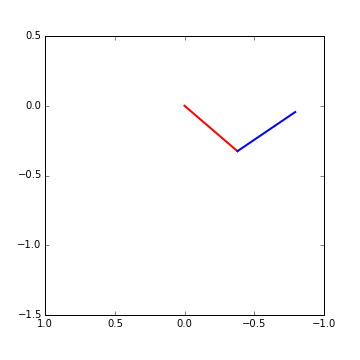
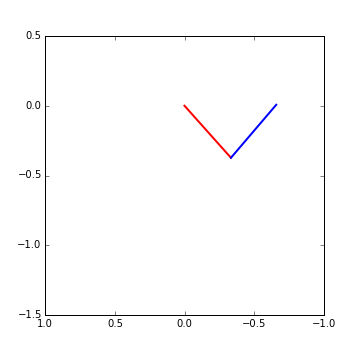
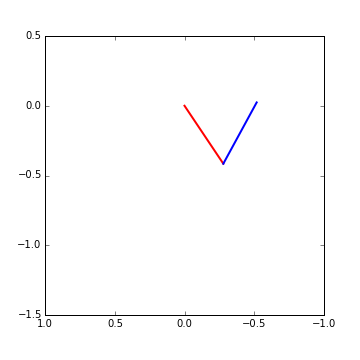
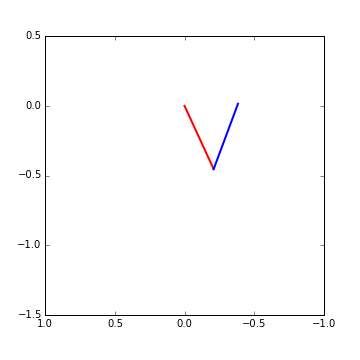
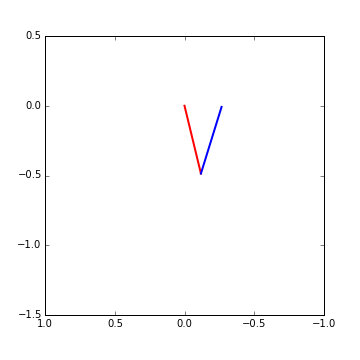
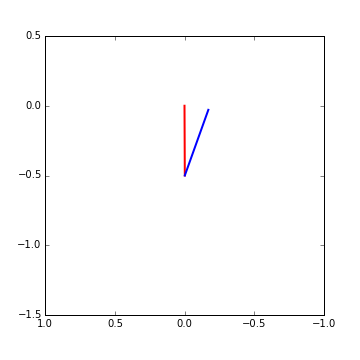
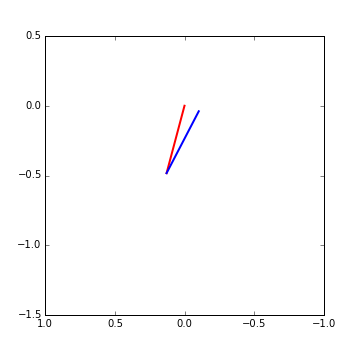
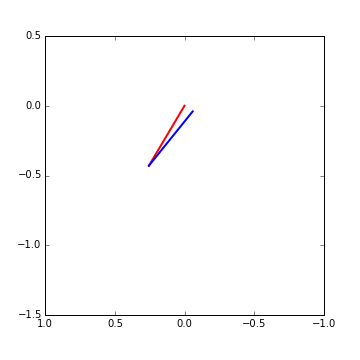
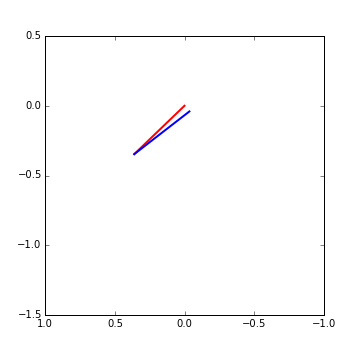
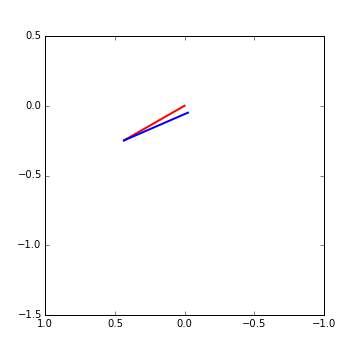
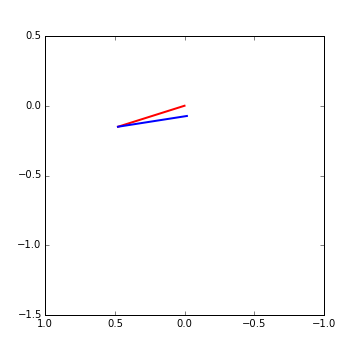
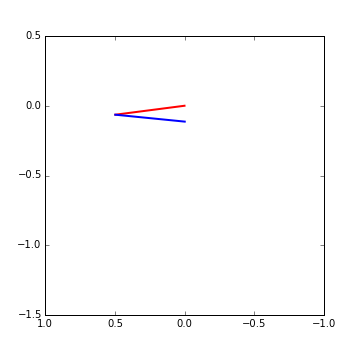
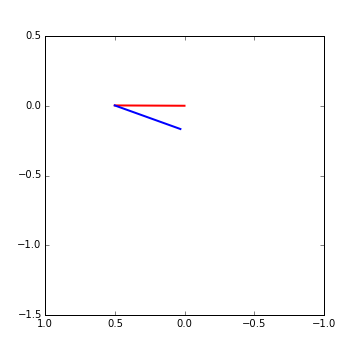
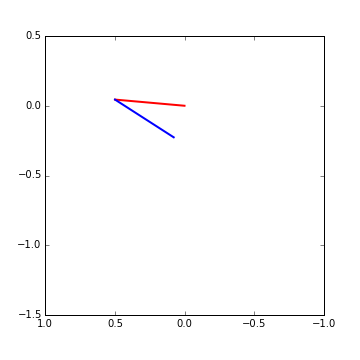
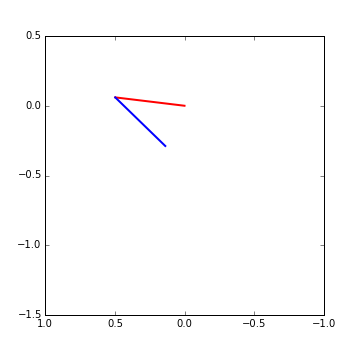
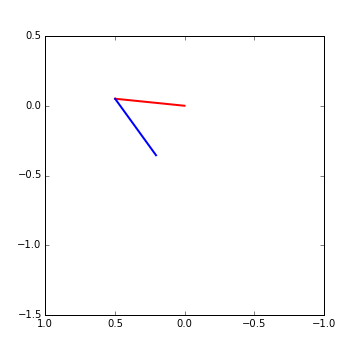
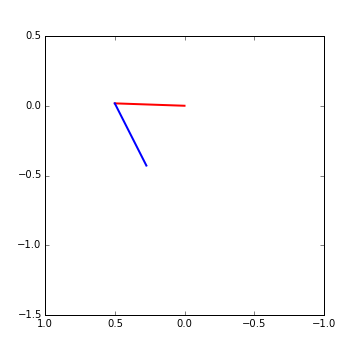
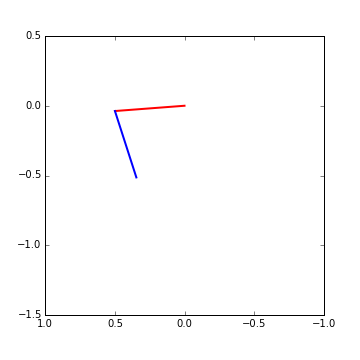
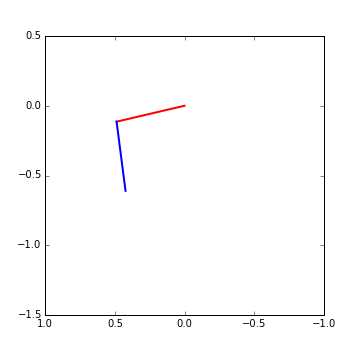
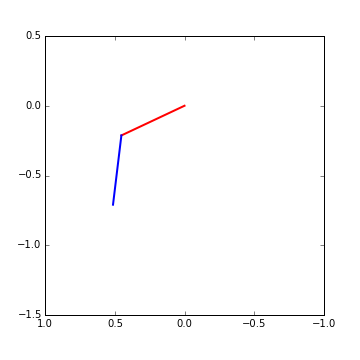
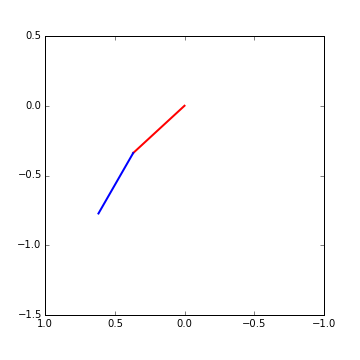
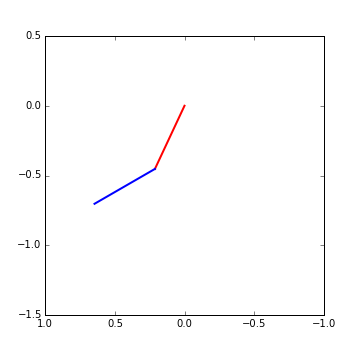
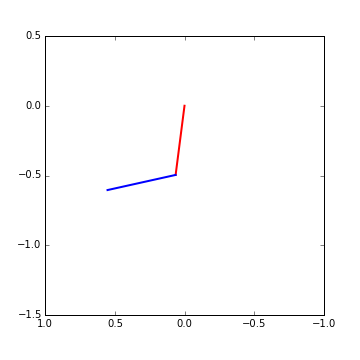
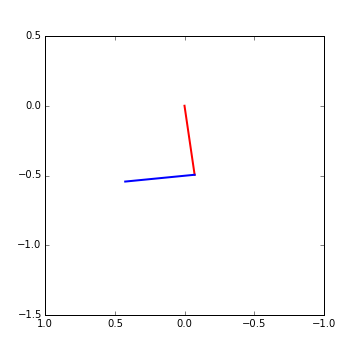
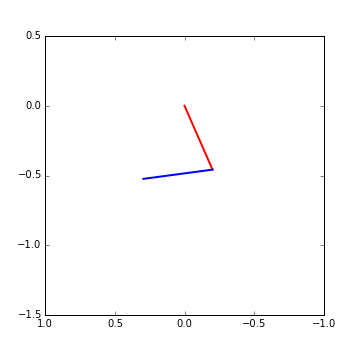
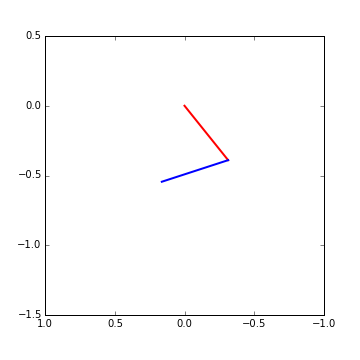
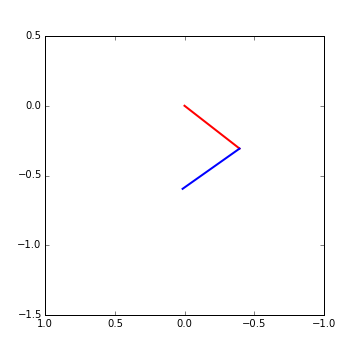
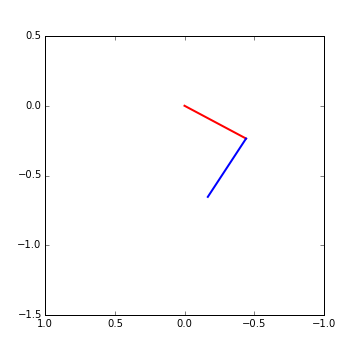
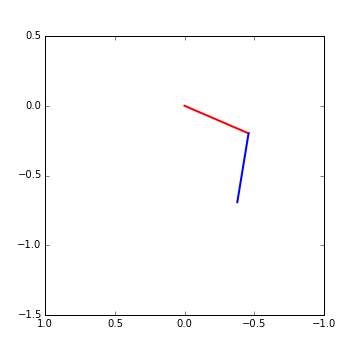
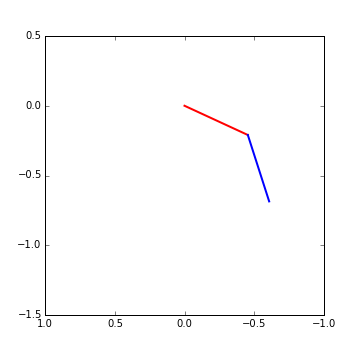
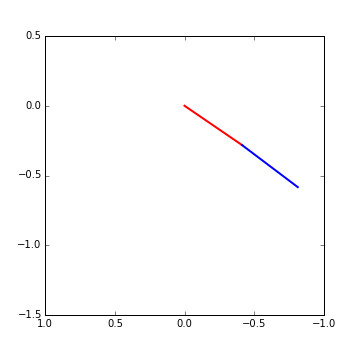
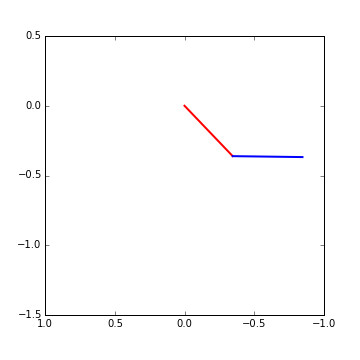
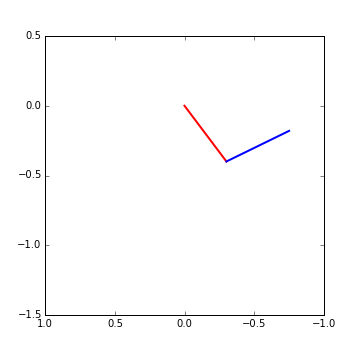
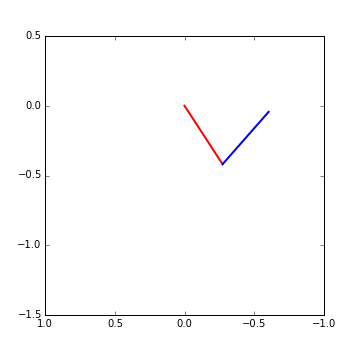
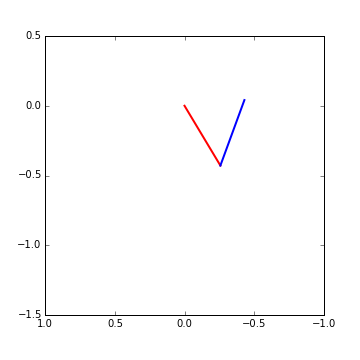
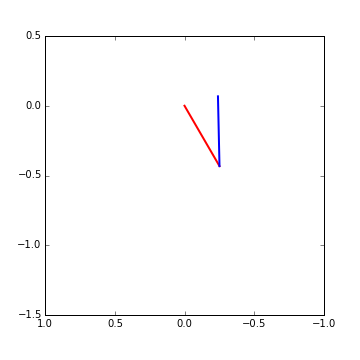
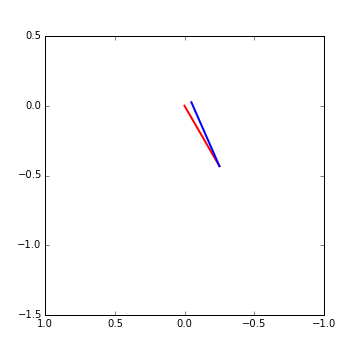
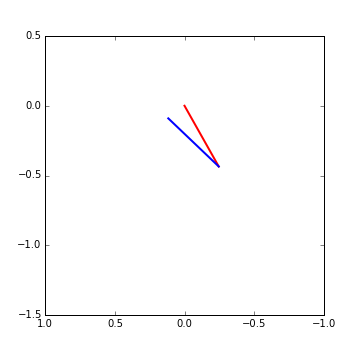
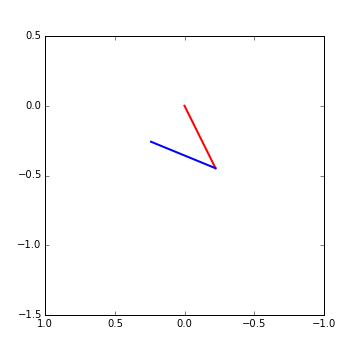
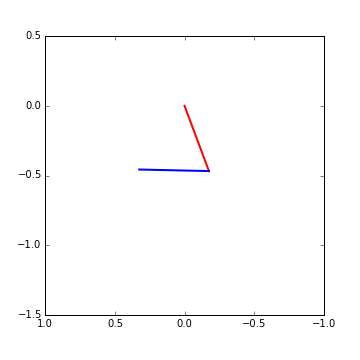
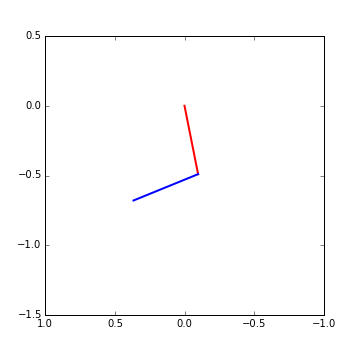
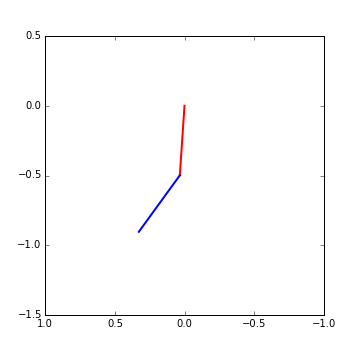
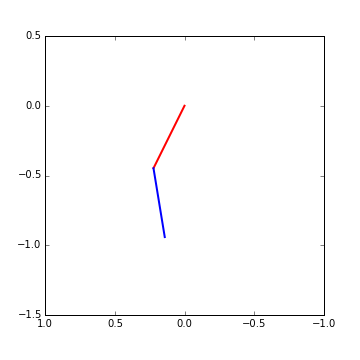
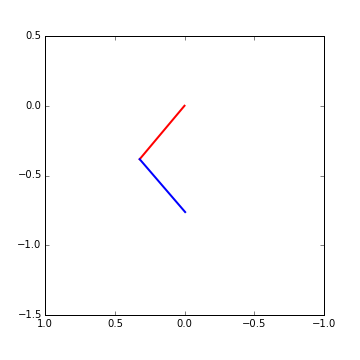
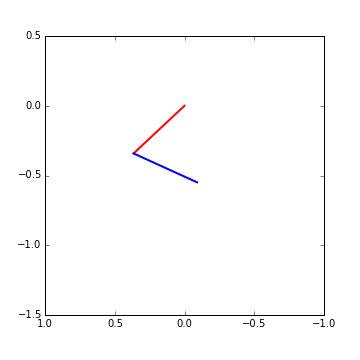
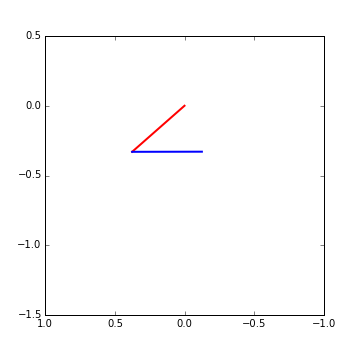
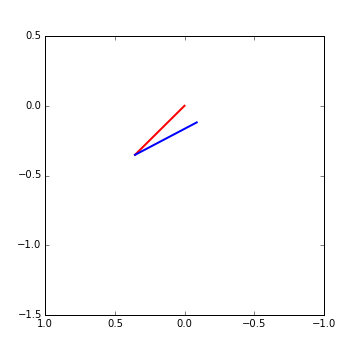
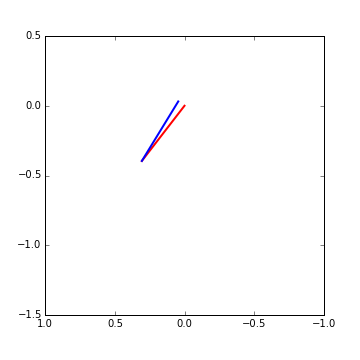
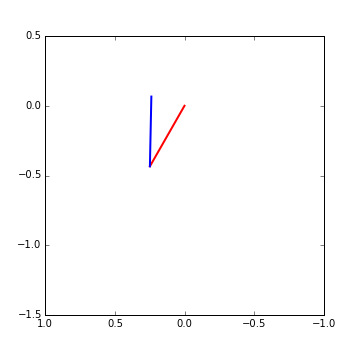
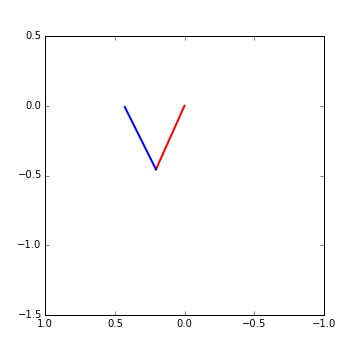
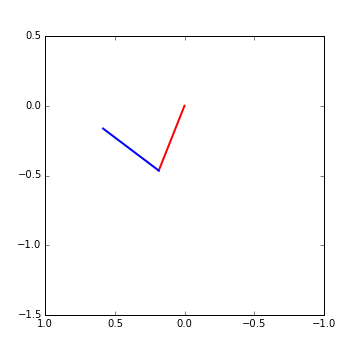
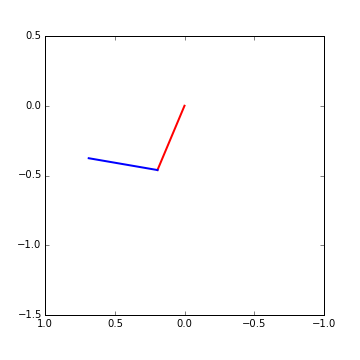
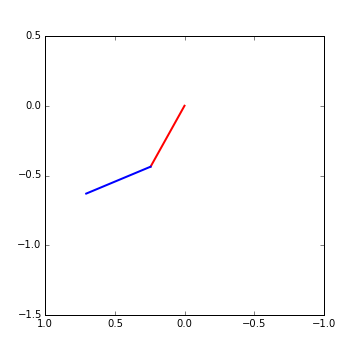
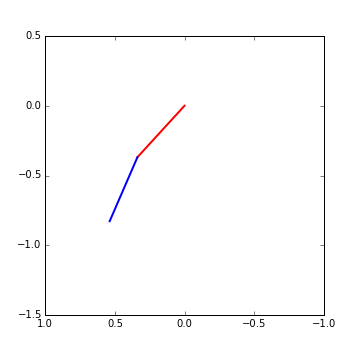
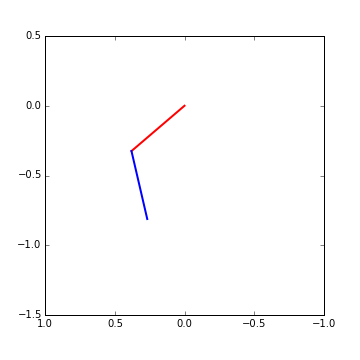
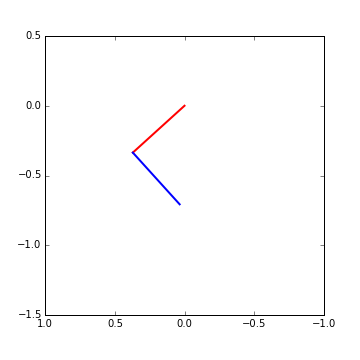
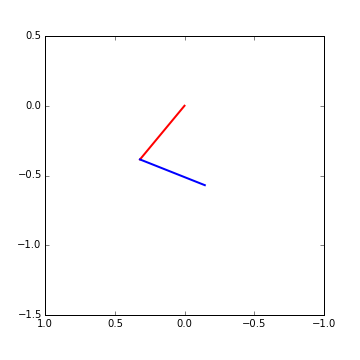
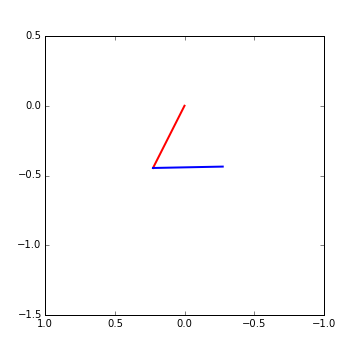
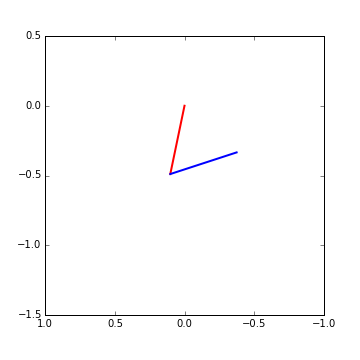
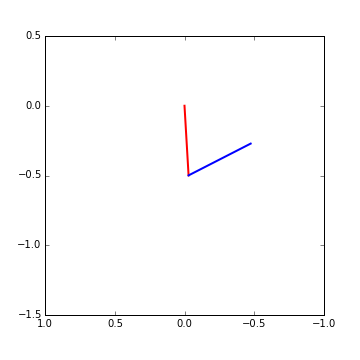
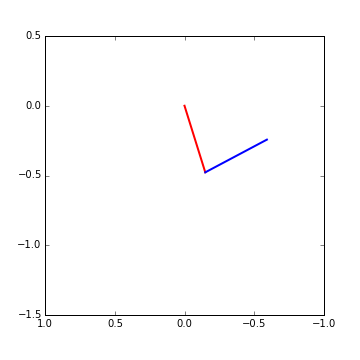
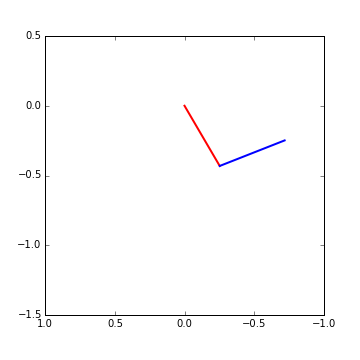
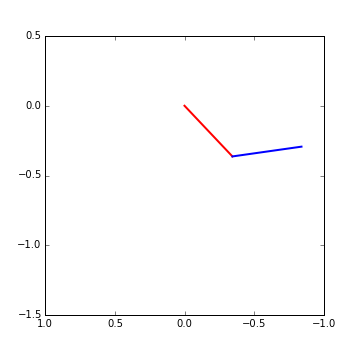
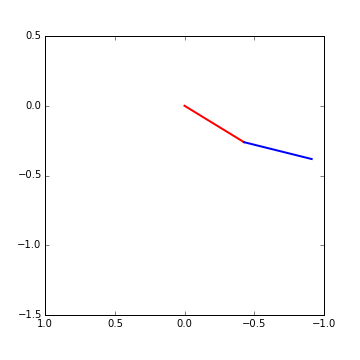
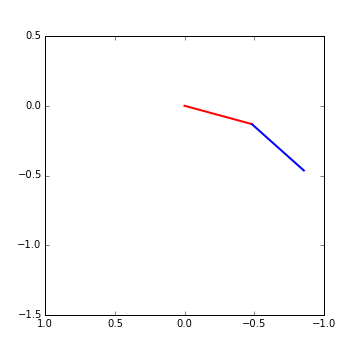
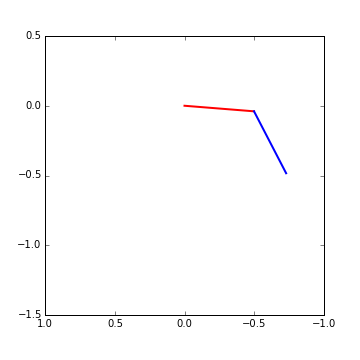
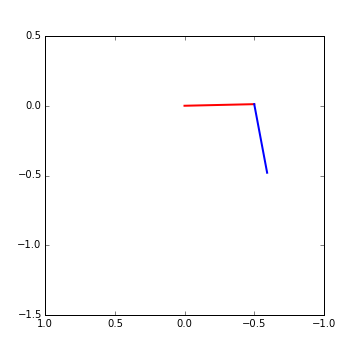
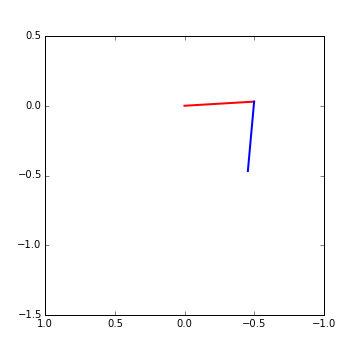
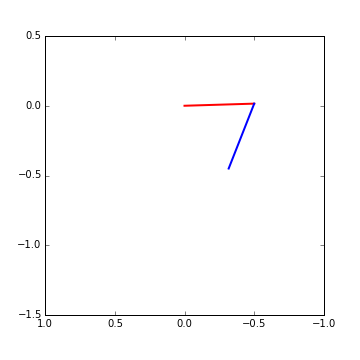
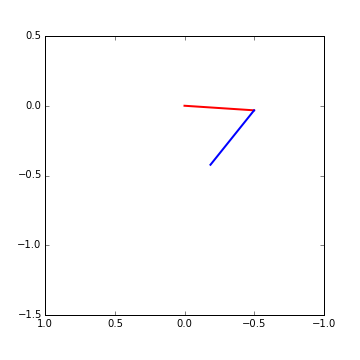
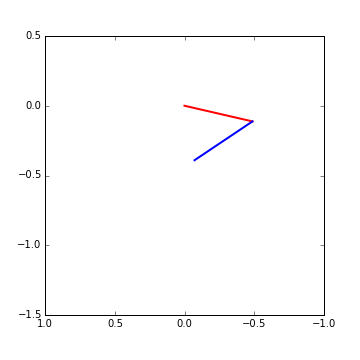
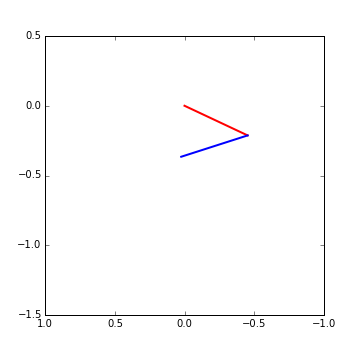
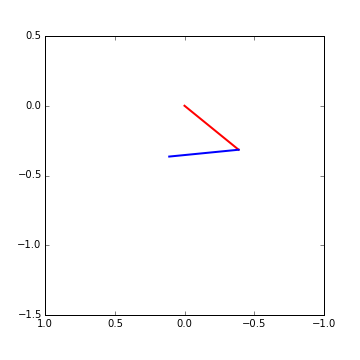
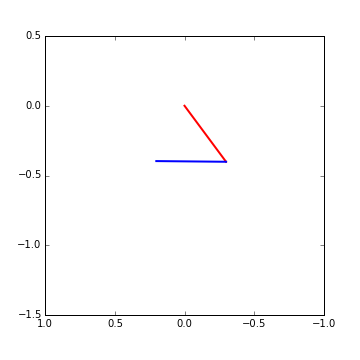
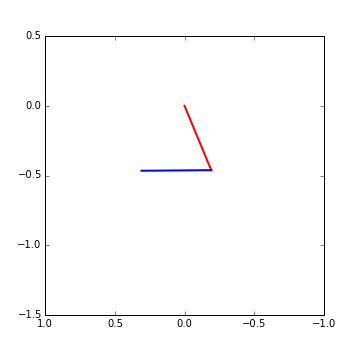
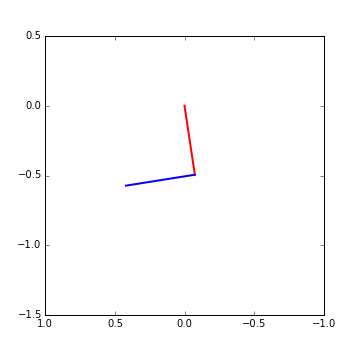
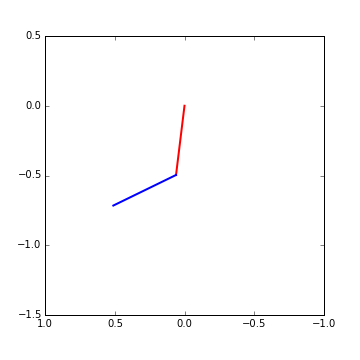
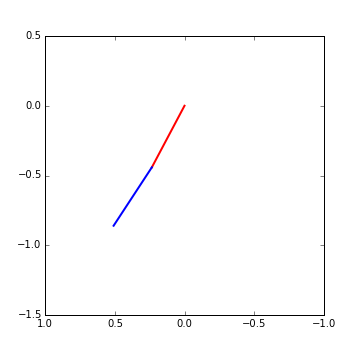
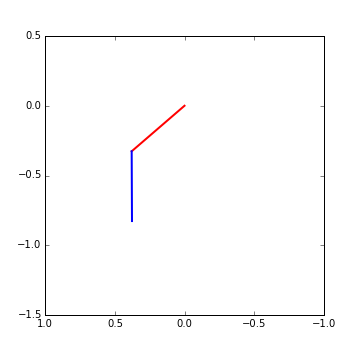
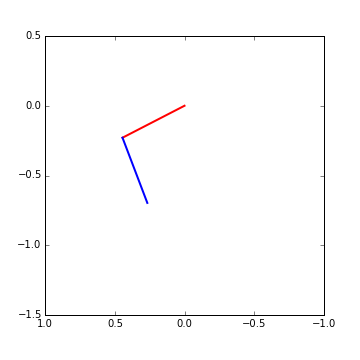
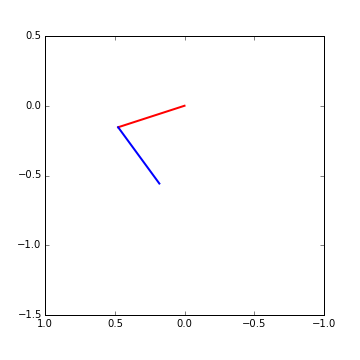
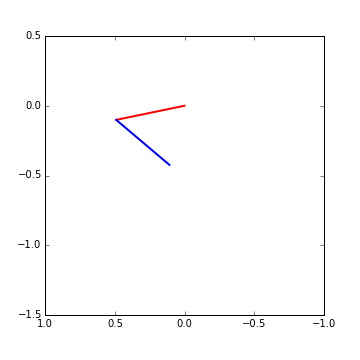
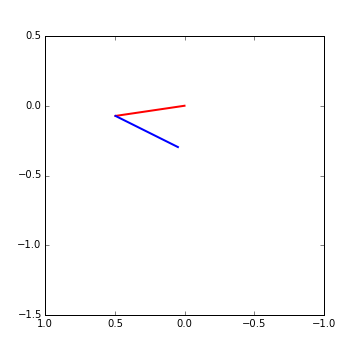
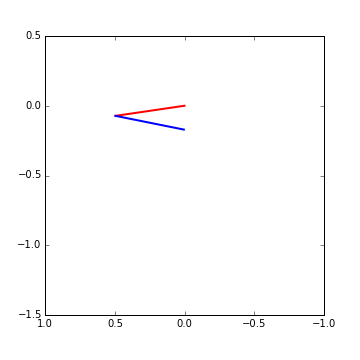
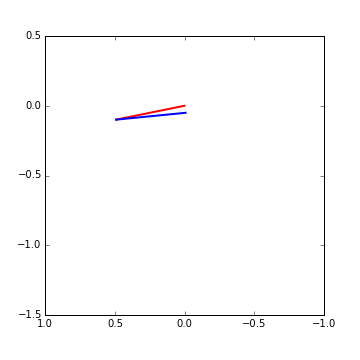
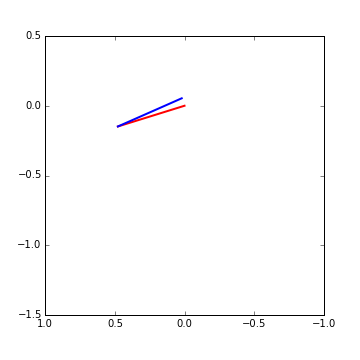
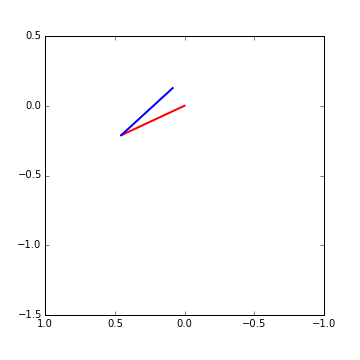
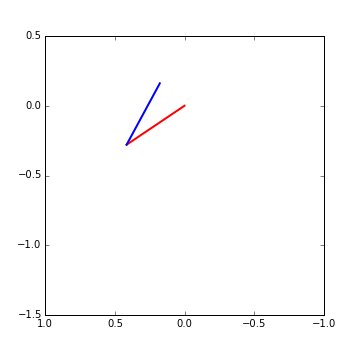
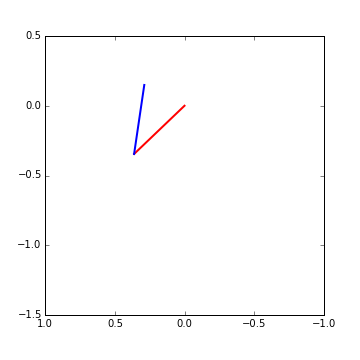
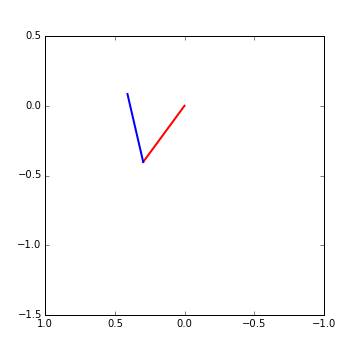
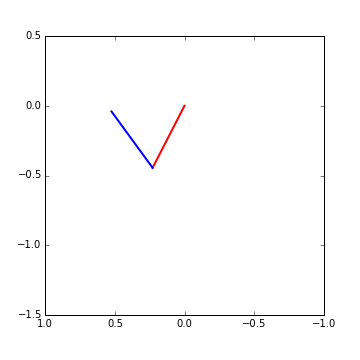
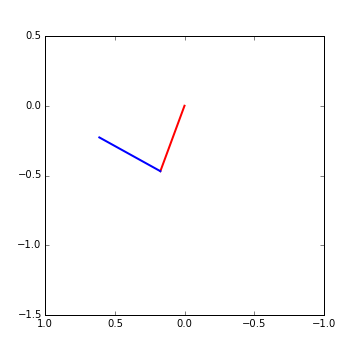
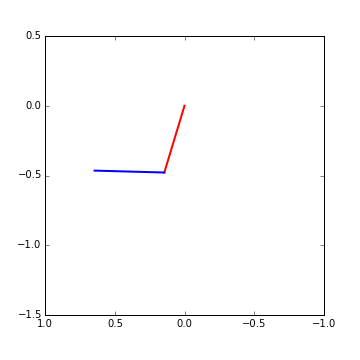
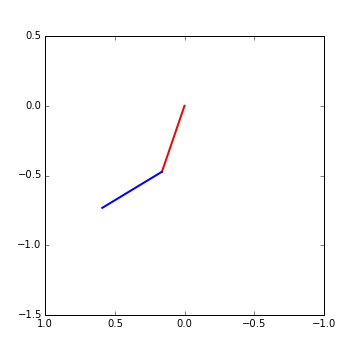
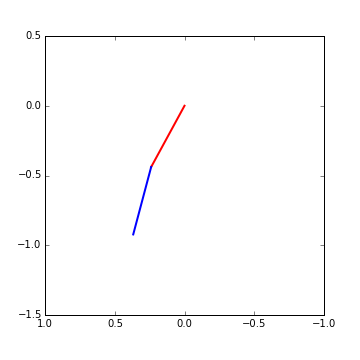
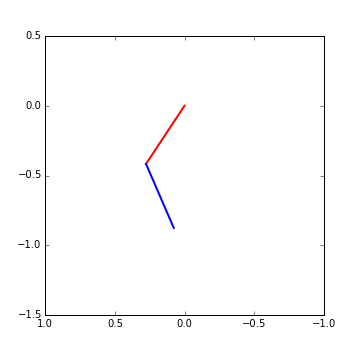
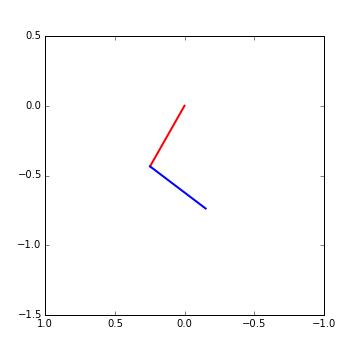
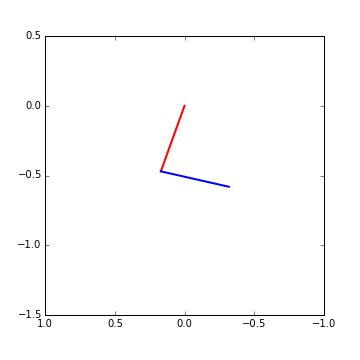
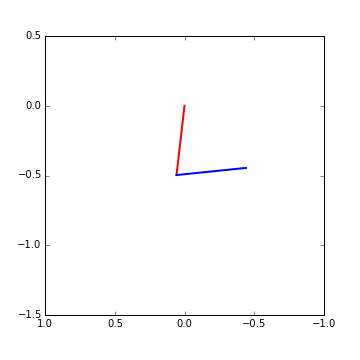
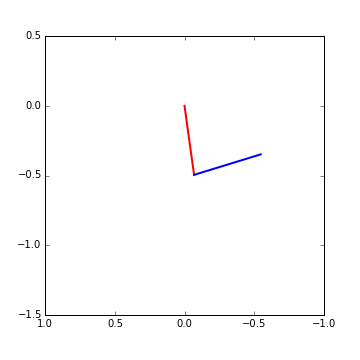
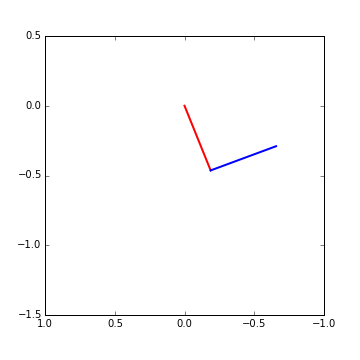
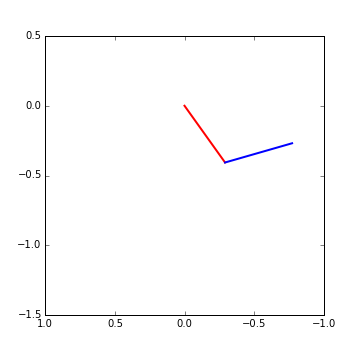
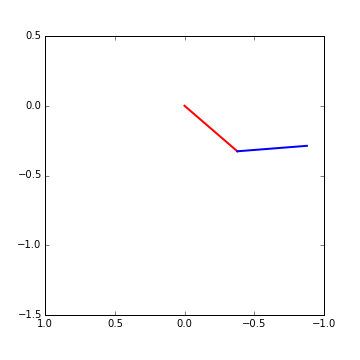
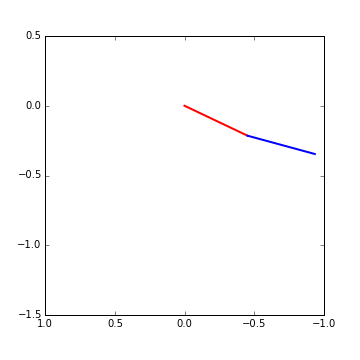
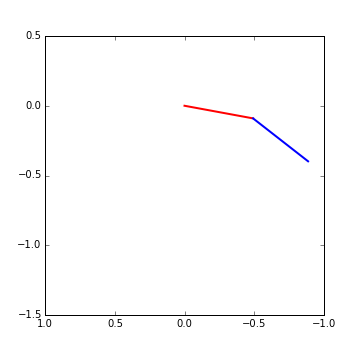
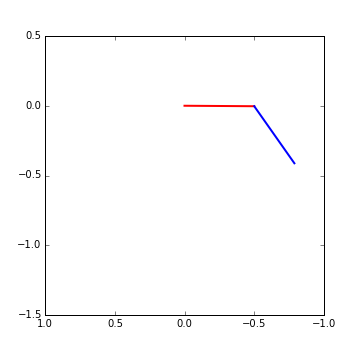
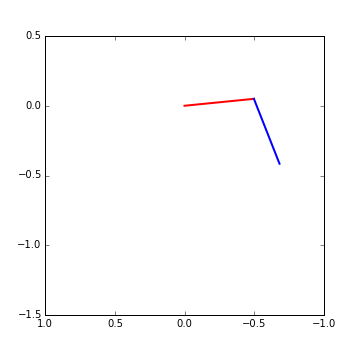
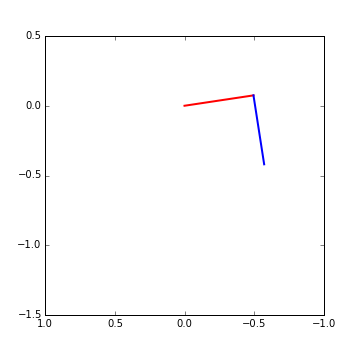
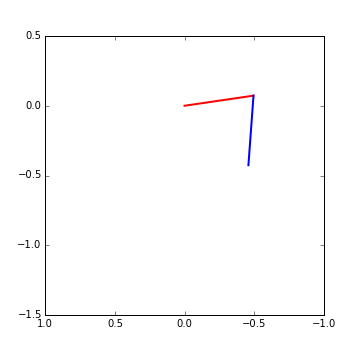
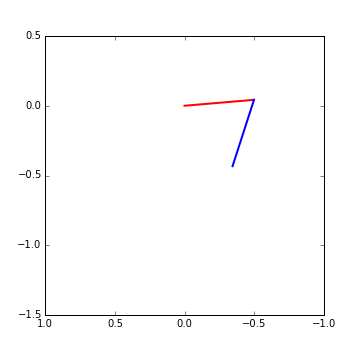
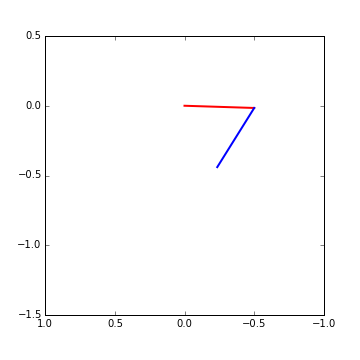
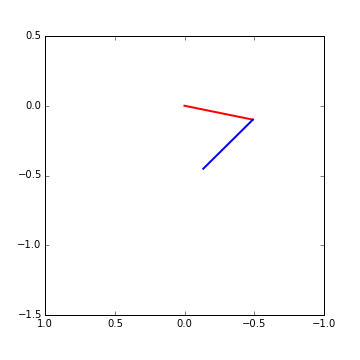
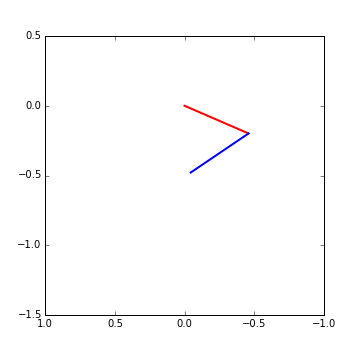
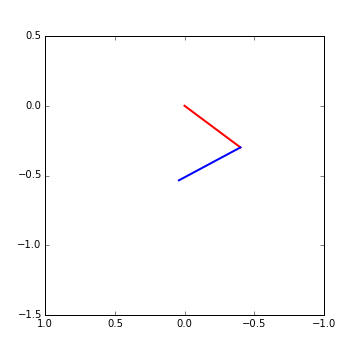
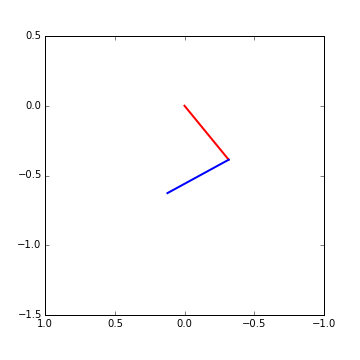
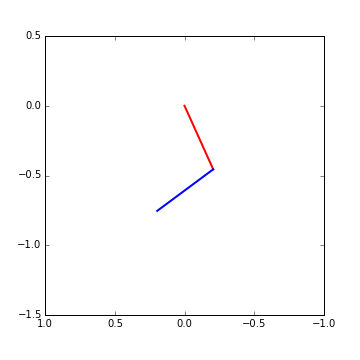
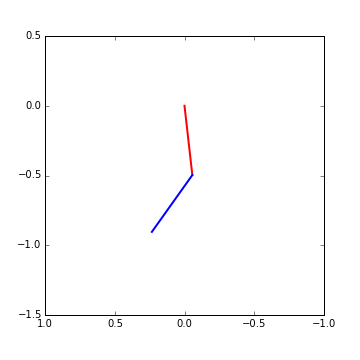
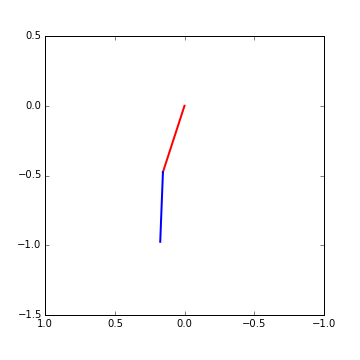
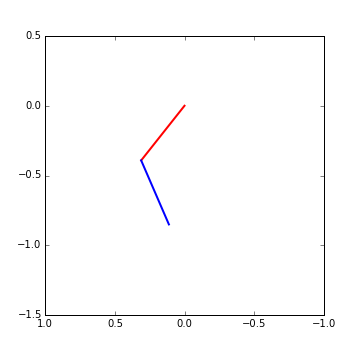
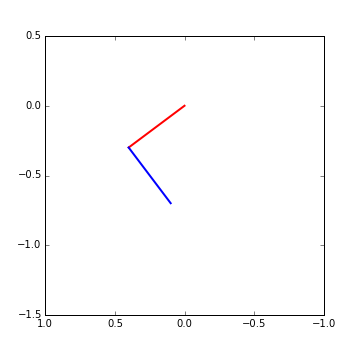
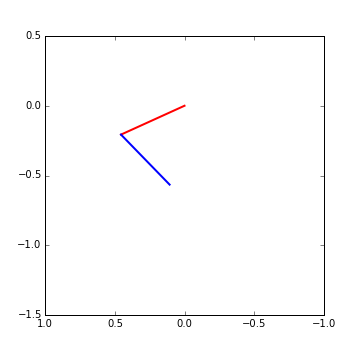
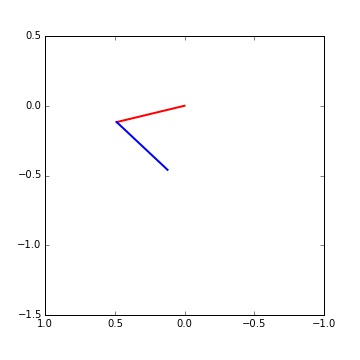
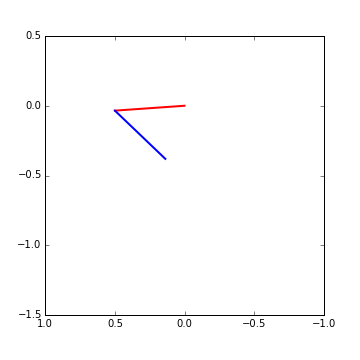
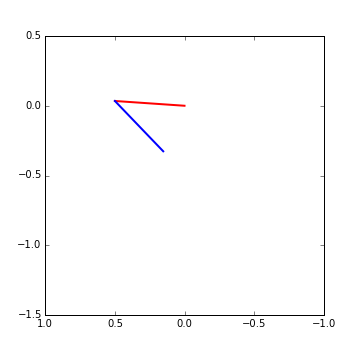
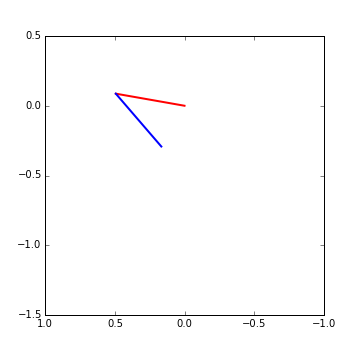
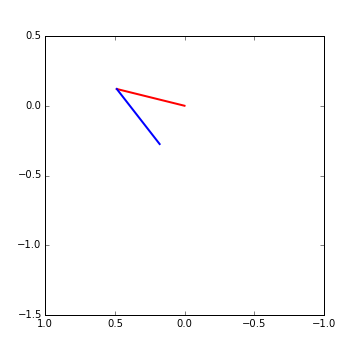
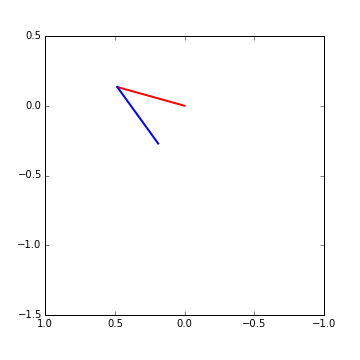
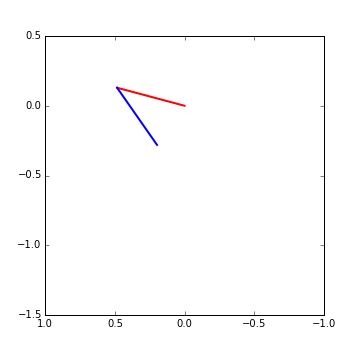
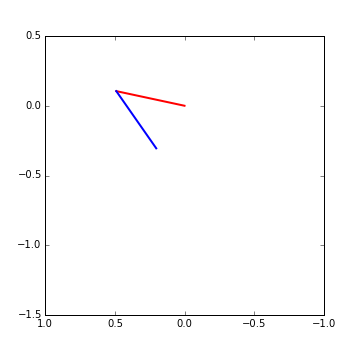
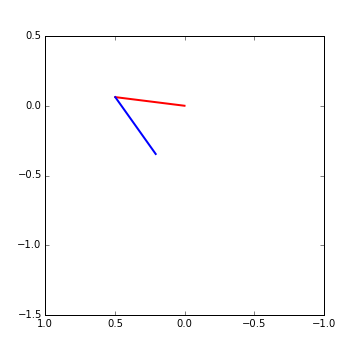
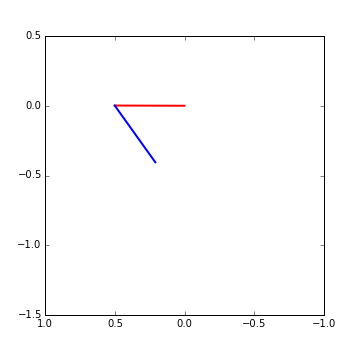
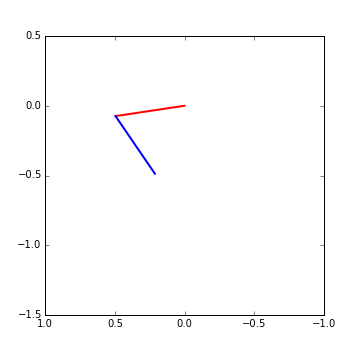
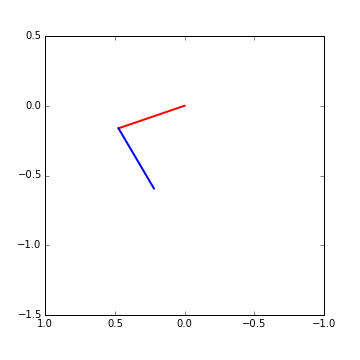
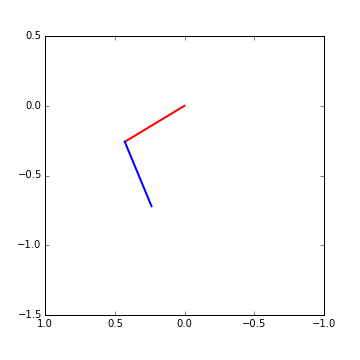
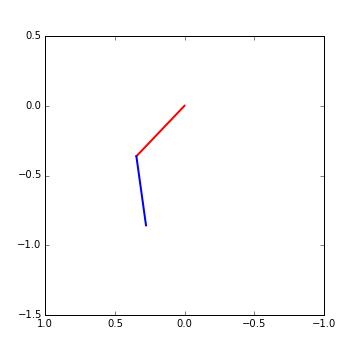
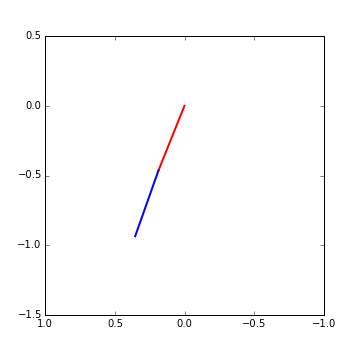

In [6]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])

def update(n): 
    # n = brojač sekvenci
    # računamo pozicije njihala
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update podataka
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])
    
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)
display_animation(anim, default_mode='once')

In [ ]:
anim.save('njihalo.gif', writer='imagemagick',fps=4)

In [10]:
from IPython.display import Image
Image(url='njihalo.gif')

Još jedan primjer animacije možete pogledati [ovdje](https://jakevdp.github.io/blog/2013/05/28/a-simple-animation-the-magic-triangle/).